# Volve Field Production Data Analytics and Machine Learning

In [40]:
import numpy as np
# Numpy is like your calcualtor in python. Your logarithm Trigo, Exponentials, linear algebra.
# built in C++ (on of the fastest programing language in the world)

import pandas as pd
# The Excel of python. Pandas is built on top of numpy. Play with data in tables

import matplotlib.pyplot as plt
# Matlab plotting

import seaborn as sns
# Statistical plotting library in python. 

In [41]:
from scipy import * 

In [42]:
import math

# Decline Curve Analysis

Understand how we can use Python to fit a known model/equation into a dataset that we think must follow the physical model

Here, we already know the physics

In [43]:
from scipy.optimize import curve_fit

# imagine a huge folder of scipy, indisde scipy there is an optimize folder, inside optimize folder u need to call curve-fit

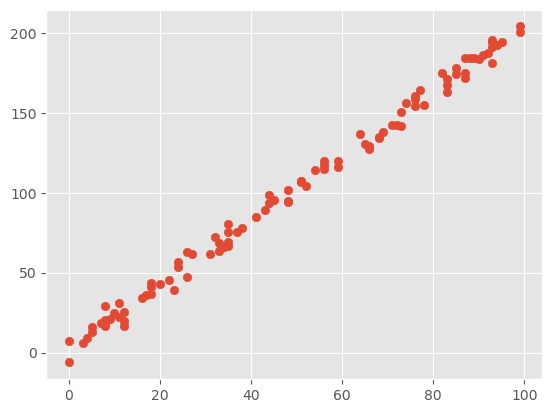

In [41]:
# Intro to numpy

x = np.random.randint(0,100,100)

# using y = mx + b
y = 2*x + 3 + np.random.randn(100)*5

# plt.plot(xaxis, yaxis)
plt.scatter(x,y)

In [42]:
# Practice for functions

def square(num):
    return np.square(num)

square(4)

16

In [43]:
def linear_model(x, m,c):

    y = m*x + c

    return y

In [44]:
params = curve_fit(linear_model,x,y)

In [45]:
m,c = params[0]

# when we run "curve_fit" function, it needs 3 inputs. we only need to CALL the first input (index 0)

In [21]:
params

(array([1.98945944, 4.0357379 ]),
 array([[ 2.19412657e-04, -1.17780713e-02],
        [-1.17780713e-02,  8.29765984e-01]]))

In [46]:
m,c

(2.0160390185100385, 2.2259254882127193)

In [47]:
yp = linear_model(x,m,c)

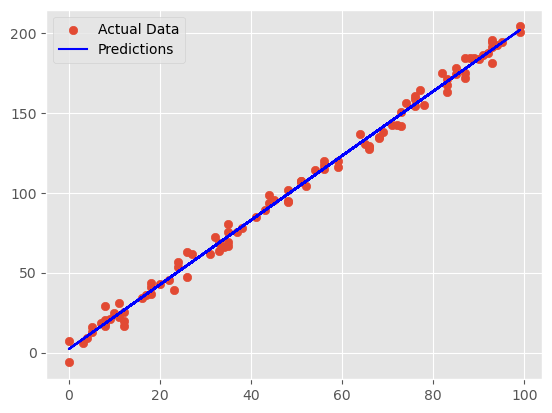

In [49]:
plt.scatter(x,y, label='Actual Data')
plt.plot(x,yp, color='blue', label='Predictions')

plt.legend()

# How to fit a Hyperbolic Model at the Actual Data

1. Import Data: Time Series Data

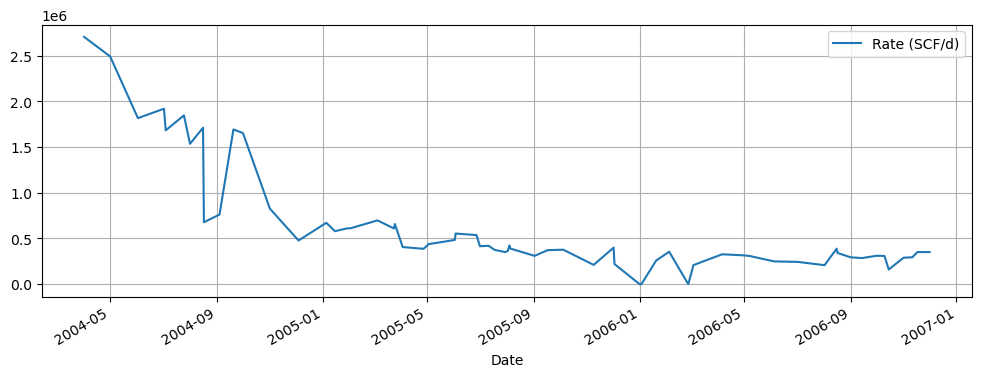

In [59]:
dca_df = pd.read_csv('https://raw.githubusercontent.com/yohanesnuwara/pyreservoir/refs/heads/master/data/norne_production_rate_sample.csv', 
           index_col = 0 , parse_dates = True)

# parse dates to convert dates into datetime format

df.head()

dca_df.plot(figsize=(12,4))
plt.grid()

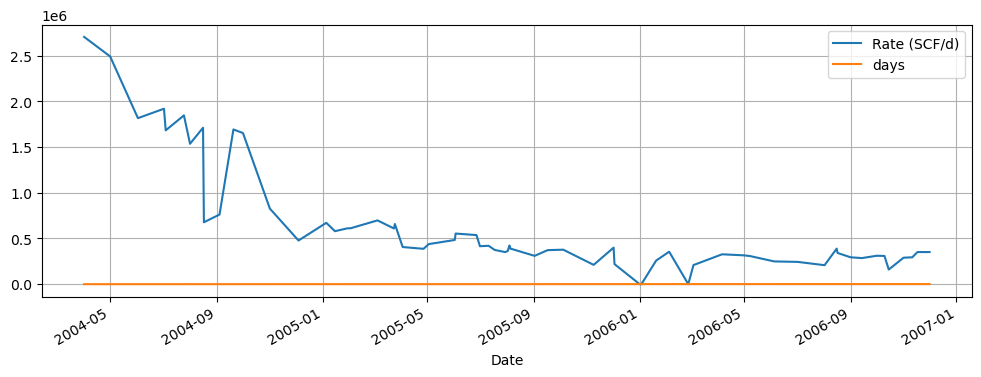

In [58]:
dca_df.plot(figsize=(12,4))
plt.grid()

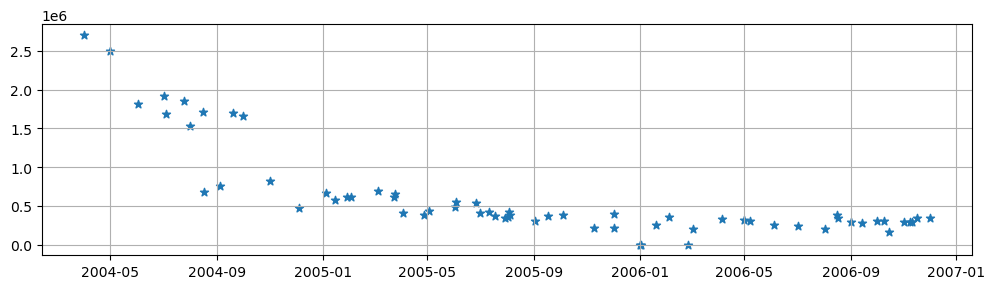

In [57]:
plt.figure(figsize=(12,3))

plt.scatter(y=dca_df['Rate (SCF/d)'], x=dca_df.index, marker = '*')

plt.grid()

In [64]:
def day_maker(df):

# pass a time-series dataframe to it and it will return a days in column. Subtracts dates and makes days.
# Returned is a days (np array).

    days = []

    for d in range(len(df)):
        delta = df.index[d] - df.index[0]

        days.append(delta.days)

    days = np.array(days)
    return days

In [65]:
dca_df['days'] = day_maker(dca_df)

In [66]:
dca_df.head()

,Rate (SCF/d),days
Date,,
2004-04-01,2706039.0,0
2004-05-01,2492086.2,30
2004-06-02,1816846.1,62
2004-07-02,1920207.4,92
2004-07-04,1683521.4,94


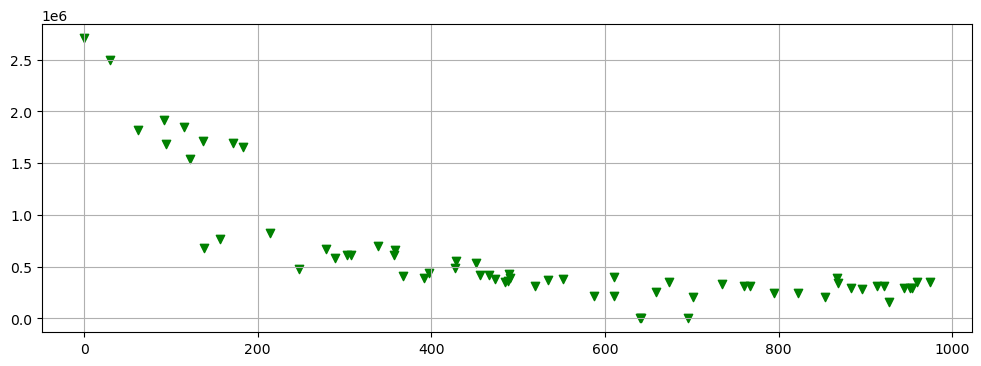

In [67]:
plt.figure(figsize=(12,4))
plt.scatter(y=dca_df['Rate (SCF/d)'], x=dca_df['days'], marker = 'v', color='green')

plt.grid()

In [55]:
plt.style.use('default')
plt.rcdefaults()


In [70]:
def q_hyp(t,qi,b,d):

    qfit = qi/(np.abs((1 + b * d* t))**(1/b))

    return qfit

def hyp_fitter(q,t):

    #First we have to Normalize so that is converges well and quick

    q_n = q/max(q)
    t_n = t/max(t)

    #curve-fit (optimiaztion of parameters)
    params = curve_fit(q_hyp, t_n, q_n)
    [qi, b, d] = params[0]


    #These are for normalized t and q
    #We must re-adjust for q and t (non-normalize)
    d_f = d/max(t)
    qi_f = qi*max(q)

    #Now we can use these parameters
    q_hyp_fit = q_hyp(t,qi_f,b,d_f)

    return q_hyp_fit,params

In [71]:
q = dca_df['Rate (SCF/d)'] ; t = dca_df['days']
q_fit ,params = hyp_fitter(q, t)

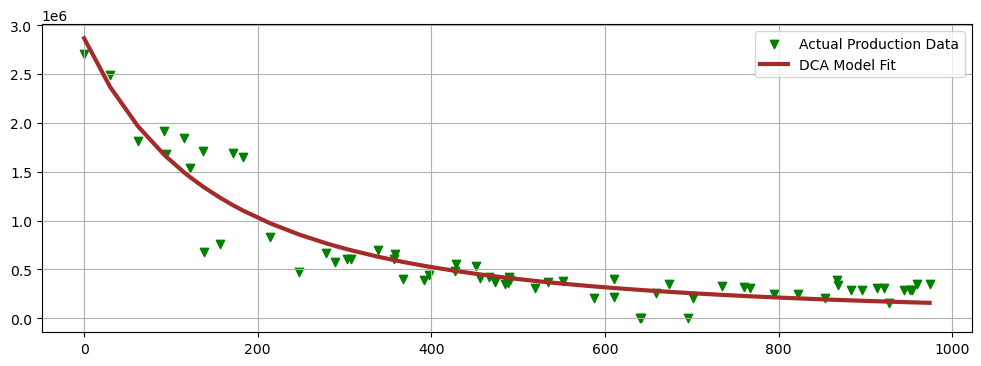

In [74]:
plt.figure(figsize=(12,4))
plt.scatter(t,q, marker ='v', color = 'green' ,label = 'Actual Production Data')
plt.plot(t,q_fit, color='brown' ,lw=3, label = 'DCA Model Fit')

plt.grid()
plt.legend()

# 2. Exploratory Data Analysis on the Volve Field

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/refs/heads/main/Volve%20P-12_DatesCorrected.csv',
                index_col=0, parse_dates=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2007-01-09 to 2016-01-12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onstreaminject_HRS              3291 non-null   float64
 1   BORE_WI_VOL                     3291 non-null   int64  
 2   ON_STREAM_HRS                   3291 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 5   AVG_DP_TUBING                   3291 non-null   float64
 6   AVG_ANNULUS_PRESS               3291 non-null   float64
 7   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 8   AVG_WHP_P                       3291 non-null   float64
 9   AVG_WHT_P                       3291 non-null   float64
 10  DP_CHOKE_SIZE                   3291 non-null   float64
 11  BORE_OIL_VOL                    3291 non-null   float64
 12  BORE_GAS_VOL    

In [50]:
df.head(10)

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-15,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-16,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-17,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-18,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

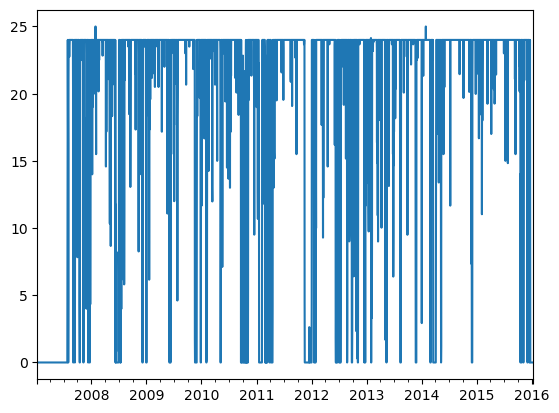

In [29]:
## what if i only want to plot onstream inj hours? and show the plot
df['onstreaminject_HRS'].plot()

<Axes: >

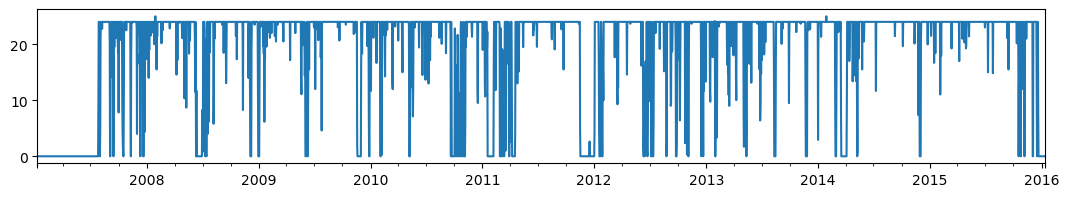

In [30]:
#fix plot size
df['onstreaminject_HRS'].plot(figsize = (13,2))

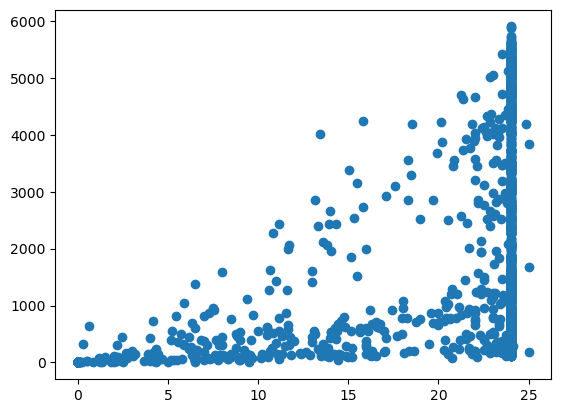

In [31]:
# plotting on-stream-hrs and bore oil volume, we will expect proportionality

plt.scatter(df['ON_STREAM_HRS'], df['BORE_OIL_VOL'])

In [32]:
df.corr()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
onstreaminject_HRS,1.000000,0.841863,0.721919,-0.008906,0.012351,0.009337,0.612743,0.633598,-0.023190,0.672484,-0.263239,0.182405,0.187947,0.411186
BORE_WI_VOL,0.841863,1.000000,0.664087,0.200564,0.221163,0.200725,0.557878,0.521919,0.093025,0.603670,-0.121651,0.368739,0.374942,0.280289
ON_STREAM_HRS,0.721919,0.664087,1.000000,0.151285,0.165454,0.143750,0.664548,0.736508,0.145377,0.890115,-0.150569,0.361124,0.371698,0.441695
AVG_DOWNHOLE_PRESSURE,-0.008906,0.200564,0.151285,1.000000,0.995501,0.959016,0.043809,-0.236868,0.607089,0.067182,0.570080,0.819920,0.816354,-0.447753
AVG_DOWNHOLE_TEMPERATURE,0.012351,0.221163,0.165454,0.995501,1.000000,0.952678,0.050419,-0.220456,0.600172,0.077749,0.556476,0.850241,0.845233,-0.456028
AVG_DP_TUBING,0.009337,0.200725,0.143750,0.959016,0.952678,1.000000,0.085105,-0.247804,0.700270,0.081012,0.651796,0.778941,0.774962,-0.403919
AVG_ANNULUS_PRESS,0.612743,0.557878,0.664548,0.043809,0.050419,0.085105,1.000000,0.424520,0.023069,0.637504,-0.203826,0.163663,0.165688,0.299597
AVG_CHOKE_SIZE_P in percentage,0.633598,0.521919,0.736508,-0.236868,-0.220456,-0.247804,0.424520,1.000000,-0.259519,0.775045,-0.501936,-0.049757,-0.043856,0.676490
AVG_WHP_P,-0.023190,0.093025,0.145377,0.607089,0.600172,0.700270,0.023069,-0.259519,1.000000,0.103721,0.934167,0.544204,0.548123,-0.323962
AVG_WHT_P,0.672484,0.603670,0.890115,0.067182,0.077749,0.081012,0.637504,0.775045,0.103721,1.000000,-0.223074,0.245750,0.256457,0.580916


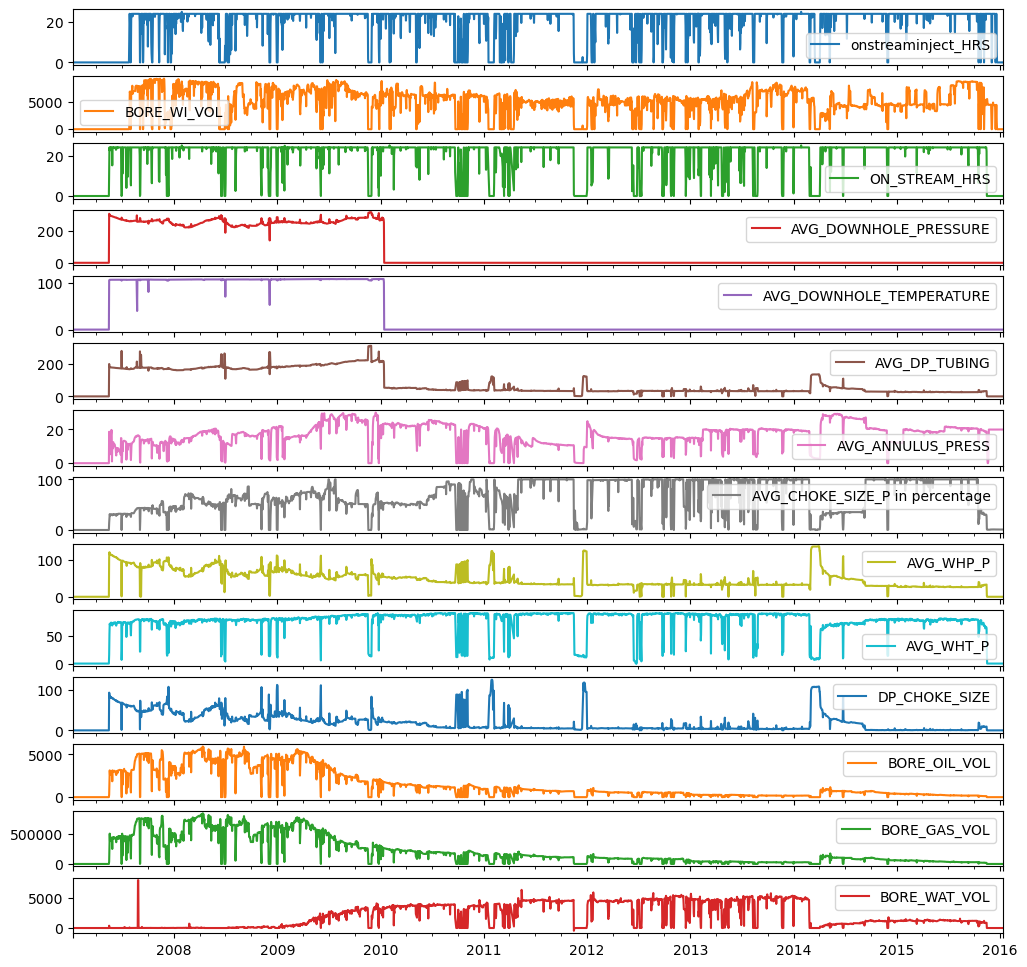

In [33]:
df.plot(subplots=True, figsize=(12,12));

# Nulls

machine learning cannot work with Nulls, empty values in the dataset

<Axes: >

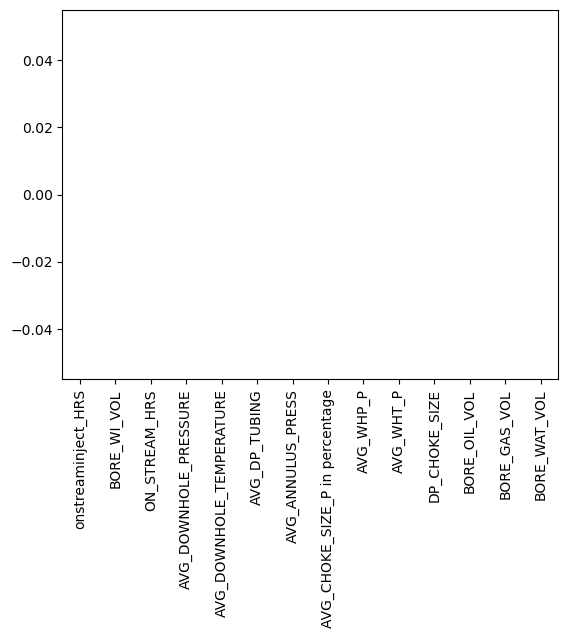

In [37]:
df.isnull().sum().sort_values().plot(kind='bar')

<Axes: >

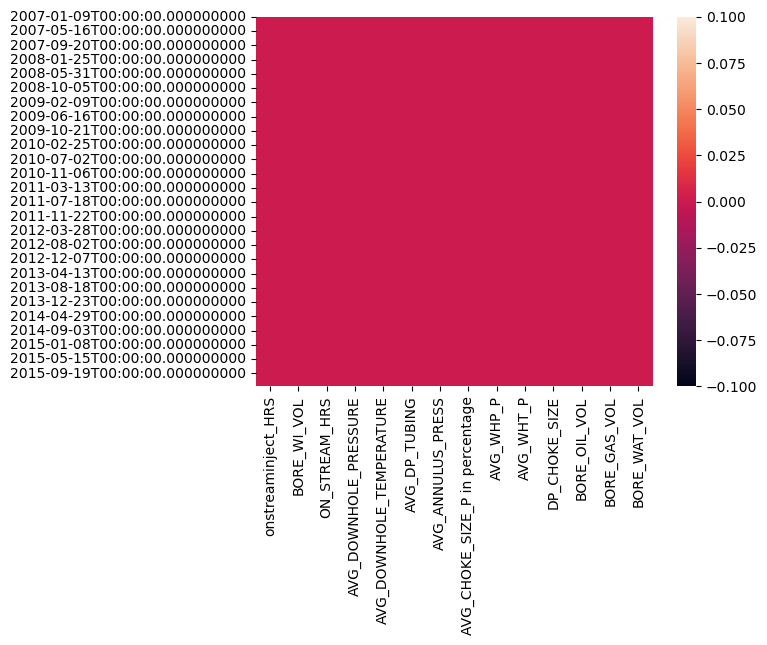

In [38]:
sns.heatmap(df.isnull())

# this shows entire data set. This is a topview of a data set. It's like your excel sheet is printed and you're looking at it from the top.

# we can see that there are no nulls. Therefore, our data set is good to go in terms of NaNs. No need to fill your dataset

# if there is null, we do interpolationg. Prevent dropping the null rows

## Descriptive statistics

try to analyze if and when outliers are there looking at max vs the IQR

how to tell when there is outliers? (1:12:00)

In [45]:
df.describe()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1402.086752,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1642.492700,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,211.000000,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000
